# Description

## Dataset1
数据集ex1data1.txt中包含了97份数据，数据的构成如下所示：

|  | 城市面积 | 利润 |
| ----------- | ----------- | ----------- |
| 样本1 | 6.1101 | 17.592 |
| 样本2 | 5.5277 | 5.5277 |


其中第一列代表餐厅所在城市面积大小，第二列表示餐厅一年的利润，试用线性模型（一元线性回归）对两者之间的关系进行拟合。

## Dataset2

数据集ex1data2.txt中包含了47份数据，数据的构成如下所示：

|  | 面积大小 | 卧室数量 | 价格 |
| ----------- | ----------- | ----------- | ----------- |
| 样本1 | 2104 | 3 | 399900 |
| 样本2 | 1600 | 3 | 329900 |

其中第一列代表房屋占地面积，第二列代表拥有卧室数量，第三列代表房屋成交价格，试用线性模型（多元线性回归）对房屋成交价格进行拟合。

## Requirements

1. 可视化数据集的样本分布结果
2. 可视化线性回归拟合结果
3. 预测在面积大小为3.1415的城市开一家餐厅的预计利润，以及面积为2000卧室数量为1的房屋的成交价格
4. 完成实验报告

# Solution

In [399]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Dataset1

### Visualizing Data Distribution

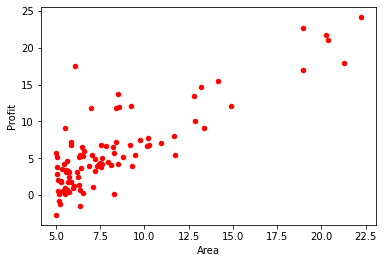

In [400]:
df1 = pd.read_csv('ex1data1.txt', sep=',', header=None)
df1 = df1.set_axis(['Area', 'Profit'], axis=1, inplace=False)

df1.plot(kind='scatter', x='Area', y='Profit', color='red')

plt.show()

### Pre-processing data

In [401]:
xs = np.array(df1['Area'])
ys = np.array(df1['Profit'])
w = 0 # parameter to learn
b = 0 # parameter to learn

### Model

In [402]:
def predict(x):
    y_pred = w * x + b
    return y_pred

def cost():
    l = 0
    for x, y in zip(np.array(df1['Area']), np.array(df1['Profit'])):
        l += (y - predict(x)) ** 2 
    return l / len(np.array(df1['Area']))
    
def gradient_w() :
    return (2 * x * (w * x + b - y))

def gradient_b() :
    return  (2  * (w * x + b - y))


### Learn

In [403]:
for epoch in range(10):
    for x, y in zip(np.array(df1['Area']), np.array(df1['Profit'])):
        # 计算梯度
        grad_w = gradient_w()
        grad_b = gradient_b()
        # 根据学习率更新参数
        w -= 0.0001 * grad_w # 学习率
        b -= 0.0001 * grad_b
        # print('\tgrad:', x, y, grad_w, grad_b )
    else:
        # 每个epoch打印参数及loss
        l = cost()
        print('progress:', epoch, 'w=', w,'b=',b, 'loss', l)

progress: 0 w= 0.5799039986265245 b= 0.044105155631284025 loss 15.656042984860848
progress: 1 w= 0.6949377510042992 b= 0.041803648104892496 loss 12.647249010744385
progress: 2 w= 0.7186483706917324 b= 0.030424763501032917 loss 12.292477646176309
progress: 3 w= 0.7244155249804393 b= 0.017301335637412586 loss 12.216777135933274
progress: 4 w= 0.726653941082169 b= 0.003873691047964635 loss 12.186643678252572
progress: 5 w= 0.728195264119961 b= -0.009575368302227157 loss 12.165206745527506
progress: 6 w= 0.7295957567131031 b= -0.022990424274513293 loss 12.14557144889323
progress: 7 w= 0.7309647049376281 b= -0.03636072556565024 loss 12.126396339649604
progress: 8 w= 0.7323235906789627 b= -0.049684294755235316 loss 12.107417740972199
progress: 9 w= 0.7336766475051549 b= -0.0629608774901853 loss 12.088583147310416


### Visualizing Model

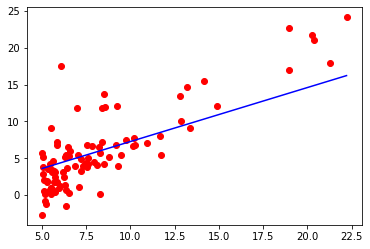

In [404]:
x_axis = np.linspace(min(xs),max(xs),100)
y_axis = predict(x_axis)

plt.plot(x_axis,y_axis,label='result',color='blue')
plt.scatter(xs,ys,color='red')

## Dataset2

### Visualizing Data Distribution

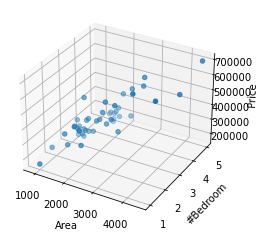

In [405]:
df1 = pd.read_csv('ex1data2.txt', sep=',', header=None)
df1 = df1.set_axis(['Area', '#Bedrooms', 'Price'], axis=1, inplace=False)

xs = np.array(df1['Area'])
ys = np.array(df1['#Bedrooms'])
zs = np.array(df1['Price'])


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('#Bedroom')
ax.set_zlabel('Price')

plt.show()

### Pre-processing data

In [406]:
w = np.zeros((3,1))
X = np.array([(xs - xs.mean()) / xs.std(), (ys - ys.mean()) / ys.std(), np.ones(len(xs))]) # normalizing data
Z = (zs-zs.mean())/zs.std()
print(X.shape)
print(Z.shape)

(3, 47)
(47,)


In [407]:
def predict_vec(x) :
    return w.T.dot(x)

def cost_vec():
    z_pred = predict_vec(X)
    return ((Z-z_pred)**2).mean()
    
def gradient_vec(X) :
    return (2 * X.dot((w.T.dot(X) + b - Z).T))/ len(xs)


In [408]:
for epoch in range(1000):
    for _ in range(len(Z)):
        # 计算梯度
        grad_vec = gradient_vec(X)
        # 根据学习率更新参数
        w -= 0.01 * grad_vec
        # print('\tgrad:', x, y, grad_w, grad_b )
    else:
        # 每个epoch打印参数及loss
        l = cost_vec()
        print('progress:', epoch, 'loss', l)

progress: 0 loss 0.380279322994529
progress: 1 loss 0.30804893722132265
progress: 2 loss 0.28664734080879706
progress: 3 loss 0.2778187961385513
progress: 4 loss 0.27398804401211496
progress: 5 loss 0.27231567943461216
progress: 6 loss 0.2715852046234381
progress: 7 loss 0.2712661951861109
progress: 8 loss 0.2711269140650057
progress: 9 loss 0.2710661179712999
progress: 10 loss 0.2710395863515339
progress: 11 loss 0.2710280101304083
progress: 12 loss 0.2710229600958549
progress: 13 loss 0.27102075739800857
progress: 14 loss 0.2710197967679885
progress: 15 loss 0.2710193778733768
progress: 16 loss 0.2710191952288106
progress: 17 loss 0.2710191156005213
progress: 18 loss 0.27101908088758564
progress: 19 loss 0.2710190657560581
progress: 20 loss 0.2710190591605942
progress: 21 loss 0.27101905628596185
progress: 22 loss 0.27101905503311907
progress: 23 loss 0.2710190544871215
progress: 24 loss 0.2710190542491818
progress: 25 loss 0.27101905414549415
progress: 26 loss 0.2710190541003113
pro

In [409]:
def output_prediction(x,y):
    x = (x - xs.mean())/xs.std()
    y = (y - ys.mean())/ys.std()
    return predict_vec([x,y,np.ones(len(xs))]) * zs.std() + zs.mean()

In [410]:
x_ax = np.linspace(852.0,4472.0,100)
y_ax = np.linspace(1.0,5.0,100)

print(output_prediction(0,0))

z_ax = [0.0 for i in range(100) for j in range(100)]
for i in range(len(x_ax)):
    for j in range(len(y_ax)):
        z_ax[i][j] = output_prediction(x_ax[i],y_ax[j])

[array([97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751, 97386.32975751,
        97386.32975751, 97386.32975751, 97386.32975751])               ]


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_20088/1570649521.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return w.T.dot(x)


TypeError: 'float' object does not support item assignment